# Retrieval Evaluation Visualization

This notebook visualizes **BM25**, **TF‑IDF**, and **Semantic** retrieval results produced by  
`retrieval_evaluation.py`.

It loads:  
`data/groundtruth/retrieval_evaluation_results.csv`  

and plots metrics such as **Precision@k**, **Recall@k**, and **MAP** to help compare retrieval methods.

In [5]:
# --- Setup ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot style
sns.set(style="whitegrid", context="talk")

# Load results
result_path = "../data/groundtruth/retrieval_evaluation_results.csv"

if not os.path.exists(result_path):
    raise FileNotFoundError(
        f"CSV not found → {result_path}\n\nRun retrieval_evaluation.py first to create it."
    )

df = pd.read_csv(result_path)
print(f"[INFO] Loaded {len(df)} query rows from {result_path}")
df

[INFO] Loaded 6 query rows from ../data/groundtruth/retrieval_evaluation_results.csv


,query,bm25_p@k,bm25_r@k,bm25_map,tfidf_p@k,tfidf_r@k,tfidf_map,sem_p@k,sem_r@k,sem_map
0,phone adapter screw problem,0.6,0.375000,0.455508,0.2,0.125000,0.134777,0.6,0.375000,0.286438
1,tripod mount loose,0.6,0.300000,0.298225,0.0,0.000000,0.066863,0.4,0.200000,0.137864
2,camera battery overheating,0.0,0.000000,0.005475,0.0,0.000000,0.001235,0.4,1.000000,1.000000
3,charging cable doesn’t fit,0.2,0.071429,0.018627,0.0,0.000000,0.004722,0.4,0.142857,0.093789
4,sd card read error,0.4,0.051282,0.073810,0.4,0.051282,0.062155,0.8,0.102564,0.169439
5,bluetooth connection failure,0.6,0.037037,0.047279,0.0,0.000000,0.034688,1.0,0.061728,0.086461


## 1. Average Metrics Summary

In [6]:
# --- Compute average metrics ---
avg = df.mean(numeric_only=True)

# rename columns for clarity
summary = avg[[
    "bm25_p@k", "bm25_r@k", "bm25_map",
    "tfidf_p@k", "tfidf_r@k", "tfidf_map",
    "sem_p@k", "sem_r@k", "sem_map"
]].rename({
    "bm25_p@k":"BM25_P@K","bm25_r@k":"BM25_R@K","bm25_map":"BM25_MAP",
    "tfidf_p@k":"TFIDF_P@K","tfidf_r@k":"TFIDF_R@K","tfidf_map":"TFIDF_MAP",
    "sem_p@k":"SEM_P@K","sem_r@k":"SEM_R@K","sem_map":"SEM_MAP"
})
summary = summary.reset_index()
summary.columns = ["Metric","Score"]
summary

,Metric,Score
0,BM25_P@K,0.400000
1,BM25_R@K,0.139125
2,BM25_MAP,0.149821
3,TFIDF_P@K,0.100000
4,TFIDF_R@K,0.029380
5,TFIDF_MAP,0.050740
6,SEM_P@K,0.600000
7,SEM_R@K,0.313692
8,SEM_MAP,0.295665


C:\Users\Jason_Fok\AppData\Local\Temp\ipykernel_28228\1423667040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Metric", y="Score", palette="viridis")


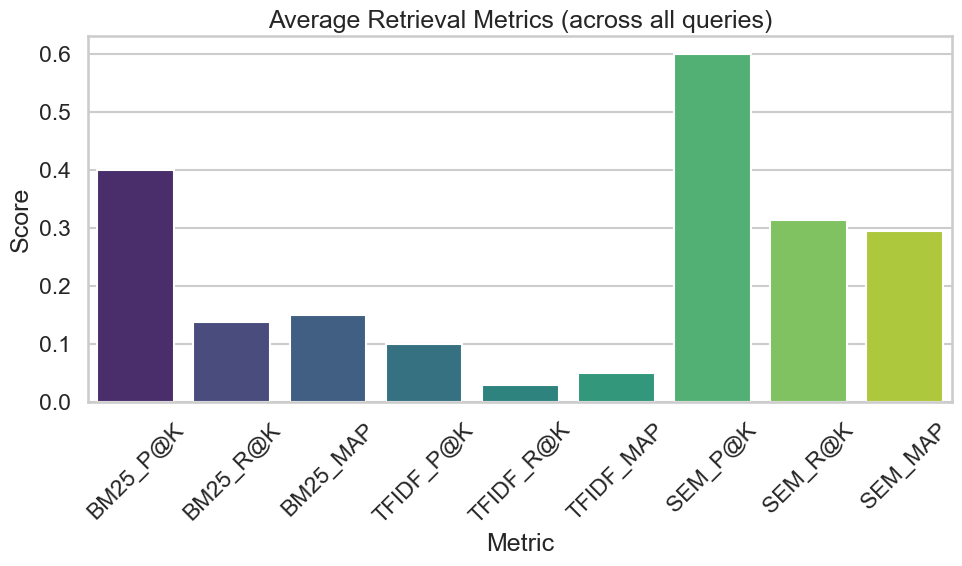

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=summary, x="Metric", y="Score", palette="viridis")
plt.title("Average Retrieval Metrics (across all queries)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Query‑wise Comparison (Semantic vs BM25 vs TF‑IDF)

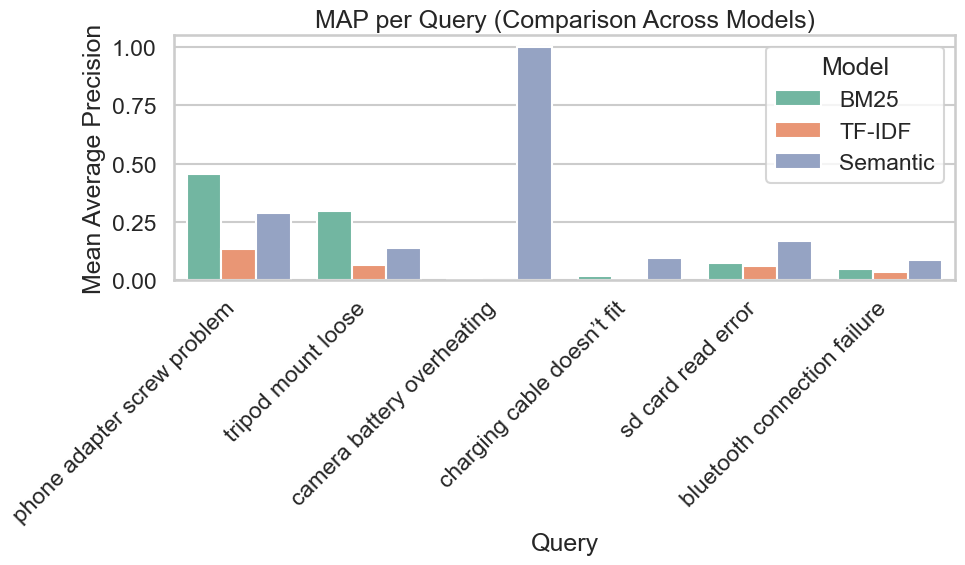

In [8]:
# Transform dataframe for long-form plotting
melt_df = df.melt(
    id_vars=["query"],
    value_vars=["bm25_map", "tfidf_map", "sem_map"],
    var_name="Model", value_name="MAP"
)
melt_df["Model"] = melt_df["Model"].replace({
    "bm25_map": "BM25",
    "tfidf_map": "TF-IDF",
    "sem_map": "Semantic"
})

plt.figure(figsize=(10,6))
sns.barplot(data=melt_df, x="query", y="MAP", hue="Model", palette="Set2")
plt.title("MAP per Query (Comparison Across Models)")
plt.xlabel("Query")
plt.ylabel("Mean Average Precision")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

## 3. Pairwise Scatter (Semantic vs BM25, TF‑IDF)

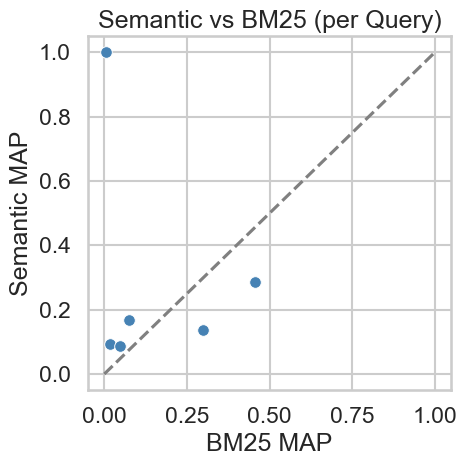

C:\Users\Jason_Fok\AppData\Local\Temp\ipykernel_28228\1708458940.py:18: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
L:\UIUC\CS 410 Text Information System\amazon-electronics-troubleshooting-retrieval\venv_cs410\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


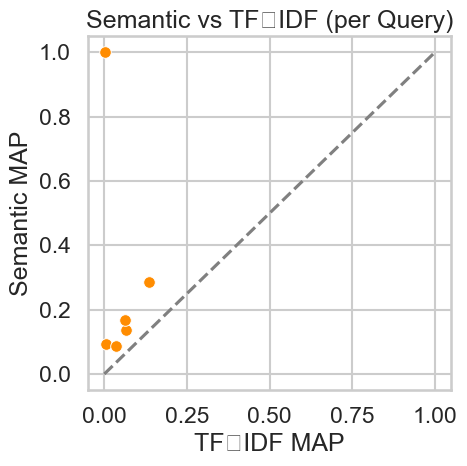

In [9]:
# Semantic vs BM25
plt.figure(figsize=(5,5))
sns.scatterplot(x=df["bm25_map"], y=df["sem_map"], s=70, color="steelblue")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("BM25 MAP")
plt.ylabel("Semantic MAP")
plt.title("Semantic vs BM25 (per Query)")
plt.tight_layout()
plt.show()

# Semantic vs TF‑IDF
plt.figure(figsize=(5,5))
sns.scatterplot(x=df["tfidf_map"], y=df["sem_map"], s=70, color="darkorange")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("TF‑IDF MAP")
plt.ylabel("Semantic MAP")
plt.title("Semantic vs TF‑IDF (per Query)")
plt.tight_layout()
plt.show()